# Where should I go on vacation to save money while improving my experience?


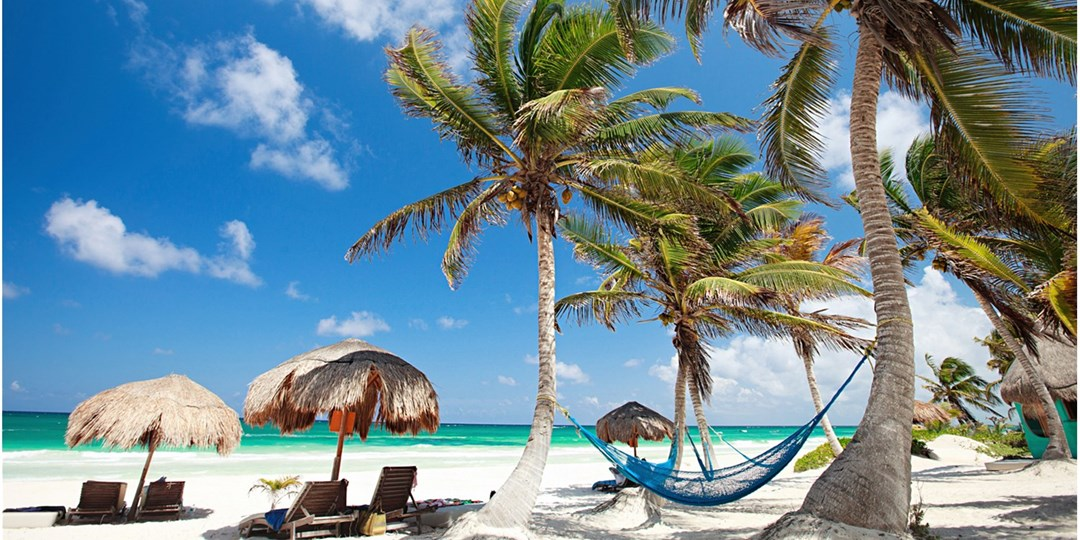

Decide where to go on vacation is certainly a tough decision since you have a set of factors to consider, among the main ones:
- How much money you have
- How many avaliable days you have
- What kind of experience you wanna have

And of course, the further you go, the more expensive it's gonna be. So, we need to choose very well the place at the moment to decide where to spend our time.

To simplify this task let's analyze the following dataframe which contains 42 destinations to go on vacations:

In [54]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
import numpy as np

## Exploratory Analysis

In [58]:
# Importamos el dataset con la informacion de posibles destinos
ruta = 'C:/Users/Roberto/Desktop/Estadistica Descriptiva/Ejercicios/clymb_adventures.csv'
df2 = pd.read_csv(ruta, encoding= 'unicode_escape')
df2.index = np.arange( 1, len(df2)+1 )
df2.tail()

,destination,duration,cost,description
38,Oregon,3,499,Raft the John Day River. With very few rapids ...
39,Oregon,5,1499,Horsepack-assisted hiking in the Wallowas for ...
40,Oregon,4,450,Climb Smith Rock. Journey to the mecca of mode...
41,Oregon,2,198,Learn to windsurf in Hood River. Trip for 2!. ...
42,Oregon,2,375,Learn to surf & sip on fine whiskey. Need a te...


In [59]:
# This dataset is already clean so we have no necesity to deal with missing values
df2.isnull().sum()

destination    0
duration       0
cost           0
description    0
dtype: int64

We can see the following:
- The dataframe has 42 rows, this means 42 destination
- The dataframe has 4 columns
    - column 1: destination
    - column 2: duration 
    - column 3: cost of stay
    - column 4: a brief destination description 
    
However, we can see some cities/countries are repeted (such is the case of Oregon). So, let's see the list of unique values:

In [60]:
# From these 42 destinations, let's see how many unique cities are
cities = df2.destination.unique().tolist()
numero = len(cities)
print('There are',numero,'unique cities/countries to go and these are:')
cities

There are 22 unique cities/countries to go and these are:


['Baja',
 'Nepal',
 'Spain',
 'Yosemite',
 'Utah',
 'San Juan Islands',
 'Oregon',
 'Hawaii',
 'Alaska',
 'New England',
 'Colorado',
 'Washington Cascades',
 'Maine',
 'Peru',
 'Vietnam',
 'Patagonia',
 'Peru and Galapagos',
 'Ecuador',
 'Vietnam Thailand and Cambodia',
 'Dominican Republic',
 'Costa Rica',
 'Crete']

Showing the unique values is always useful to know the number of levels a categorical variable has.

### Analysis of Costs
Now, let's see what the cheapest and the more expensive destination places in our dataframe are:

In [61]:
for i in range( 1, len(df2) +1 ):
    if df2.cost[i] == min(df2.cost):
        chepeast = i

for i in range( 1, len(df2) +1 ):
    if df2.cost[i] == max(df2.cost):
        MoreExpensive = i

In [62]:
print('The cheapest destination is:')
df2[chepeast:chepeast+1]

The cheapest destination is:


,destination,duration,cost,description
42,Oregon,2,375,Learn to surf & sip on fine whiskey. Need a te...


In [63]:
print('The most expensive destination is:')
df2[MoreExpensive:MoreExpensive+1]

The most expensive destination is:


,destination,duration,cost,description
22,Colorado,3,599,Hut to Hut backcountry skiing in the San Juan ...


Comparing the two previous packages we can see the Colorado-package is almost twice expensive than the Oregon-package, however the Colorado one is a 3 days experience while the Oregon-package is just a 2 days one.

To avoid this problem we can generate a new column called "ratio" which will be the cost per day:
$$
ratio=\frac{cost}{duration}
$$ 
and concatenate it in our dataframe:

In [64]:
df2['ratio'] = df2.cost / df2.duration
df2.head()

,destination,duration,cost,description,ratio
1,Baja,7,899,Hike Bike and Sea Kayak and more on a Remote P...,128.428571
2,Nepal,11,899,Explore the land and culture of the Himalayas....,81.727273
3,Spain,8,568,Sport climb & deep water solo in Mallorca. Dis...,71.000000
4,Yosemite,5,750,Guided hiking through stunning high country. E...,150.000000
5,Utah,6,1356,Hike. Canyoneer. Rock Climb. and more!. Experi...,226.000000


Let's obtain the maximum and minimum of the variable ratio and compare with the above results:

In [65]:
for i in range( 1, len(df2) +1 ):
    if df2.ratio[i] == min(df2.ratio):
        chepeast = i

for i in range( 1, len(df2) +1 ):
    if df2.ratio[i] == max(df2.ratio):
        MoreExpensive = i
        
print('The actual cheapest destination is:')
df2[chepeast:chepeast+1]

The actual cheapest destination is:


,destination,duration,cost,description,ratio
17,Peru,7,849,Trek the Inca Trail to Machu Picchu. Trek the ...,121.285714


In [66]:
print('The most actual expensive destination is:')
df2[MoreExpensive:MoreExpensive+1]

The most actual expensive destination is:


,destination,duration,cost,description,ratio
38,Oregon,3,499,Raft the John Day River. With very few rapids ...,166.333333


surprisingly after computing the ratio, Oregon turned out to be the most expensive one and Peru the cheapest one.

**To understand better the distribution of time and cost of stay of the different destinations let's do some heatmaps:**
- First we'll study the dataframe by groups
- Then we'll do a general analysis of all the groups

In [67]:
# Let's group our dataframe by the variable "destination" and show them
df_grouped = df2.groupby('destination')

for names, groups in df_grouped:
    print(names)
    print(groups)

Alaska
   destination  duration  cost  \
10      Alaska         7  1625   

                                          description       ratio  
10  Wilderness Packrafting. Packrafting is quickly...  232.142857  
Baja
  destination  duration  cost  \
1        Baja         7   899   

                                         description       ratio  
1  Hike Bike and Sea Kayak and more on a Remote P...  128.428571  
Colorado
   destination  duration  cost  \
13    Colorado         3   439   
14    Colorado         2   339   
22    Colorado         3   599   
24    Colorado         2   399   
25    Colorado         5  1199   

                                          description       ratio  
13  AIARE Level I Alpine Instructional Course. Ear...  146.333333  
14  Learn to ice climb. Learn the basics of ice cl...  169.500000  
22  Hut to Hut backcountry skiing in the San Juan ...  199.666667  
24  Lern to Ice Climb in the San Juan Mountains. A...  199.500000  
25  Incrtuctional Winter Mou

***Let's analyze the duration and cost distribution of the destination "Oregon"***


In [68]:
# From the grouped dataframe we extract the Oregon object:
Oregon=df_grouped.get_group('Oregon')

# let's show it:
Oregon

,destination,duration,cost,description,ratio
8,Oregon,6,899,Circumnavigate Crater Lake. Experience the pri...,149.833333
36,Oregon,4,299,Mountain bike from hut-to-hut on the Mt Hood L...,74.750000
37,Oregon,6,2898,Crater Lake to Bend Cycling Tour. Skirt the ri...,483.000000
38,Oregon,3,499,Raft the John Day River. With very few rapids ...,166.333333
39,Oregon,5,1499,Horsepack-assisted hiking in the Wallowas for ...,299.800000
40,Oregon,4,450,Climb Smith Rock. Journey to the mecca of mode...,112.500000
41,Oregon,2,198,Learn to windsurf in Hood River. Trip for 2!. ...,99.000000
42,Oregon,2,375,Learn to surf & sip on fine whiskey. Need a te...,187.500000


<AxesSubplot:xlabel='duration'>

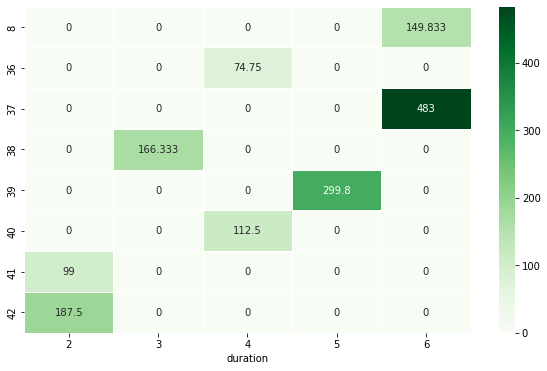

In [69]:
# To do the heatmap we create de pivot table firt
tabla = pd.pivot_table(Oregon, index = Oregon.index, columns='duration', values='ratio', fill_value=0)
tabla = tabla.fillna('0')

# Now we plot
plt.figure(figsize=(10,6))
plt.title=('Heatmap Duration/Destination')
sns.heatmap(tabla, cmap='Greens',  annot=True, linewidth=1, fmt='g')

From the "Oregon" heatmap we conclude the following:
- The package with the highest ratio (the least convinient) is the 37'th, its cost is 2,398 dlls per 6 days.
- The package with the lowest ratio (the most convinient) is the 36'th, its cost is 299 dlls per 4 days.

***Doing the same analysis for "Colorado"***

In [70]:
# From the grouped dataframe we scrap the Colorado object:
Colorado=df_grouped.get_group('Colorado')

# let's show it:
Colorado

,destination,duration,cost,description,ratio
13,Colorado,3,439,AIARE Level I Alpine Instructional Course. Ear...,146.333333
14,Colorado,2,339,Learn to ice climb. Learn the basics of ice cl...,169.500000
22,Colorado,3,599,Hut to Hut backcountry skiing in the San Juan ...,199.666667
24,Colorado,2,399,Lern to Ice Climb in the San Juan Mountains. A...,199.500000
25,Colorado,5,1199,Incrtuctional Winter Mountaineering Course. Sn...,239.800000


<AxesSubplot:xlabel='duration'>

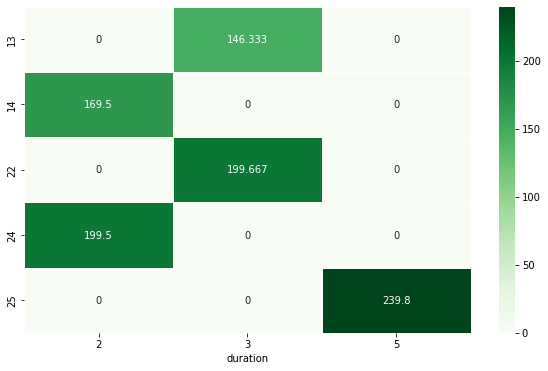

In [71]:
# To do the heatmap we create de pivot table firt
tabla2 = pd.pivot_table(Colorado, index=Colorado.index, columns='duration', values='ratio', fill_value=0)
tabla2 = tabla2.fillna('0')

# Now we plot
plt.figure(figsize=(10,6))
sns.heatmap(tabla2, cmap='Greens', annot=True, linewidth=1, fmt='g')

From the "Colorado" heatmap we observe:
- The package with the highest ratio (least convenient) is the 25'th, its cost is 1,199 dlls per 5 days.
- The package with the lowest ratio (most convinient) is the 13'th, its cost is 439 dlls per 3 days.

***Doing the same analysis for all the destinations***

<AxesSubplot:xlabel='duration', ylabel='destination'>

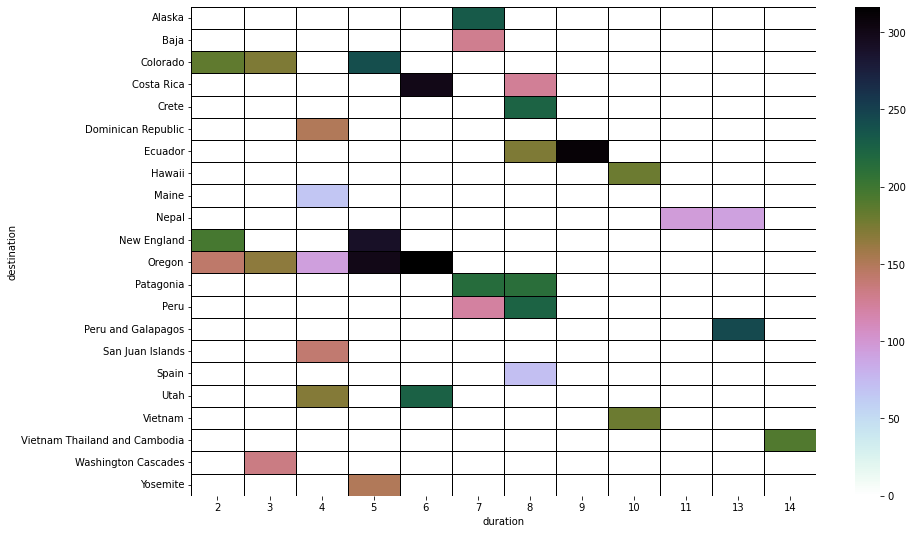

In [99]:
# Para hacer el heatmap primero debemos generar la tabla pivote
tabla = pd.pivot_table(df2, index='destination', columns='duration', values='ratio', fill_value=0)
tabla = tabla.fillna('0')
plt.figure(figsize=(14,9))
sns.heatmap(tabla, cmap='cubehelix_r', linewidth=0.5, linecolor='Black')

Taking a little look at this heatmap we observe:
- Among the cheapest packages are: the 4-days Maine package, the 8-days Spain package, among others...
- The most expensive ones are: the 9-days Ecuador package, the 5-days New England package, among others.

### Summary

Doing this exploratory analysis we've realized which isolated destination are the most convenient (cheapest/durable) as well as the least convinients (more expensive/least durable). 

However we have considered the duration and cost variables only, without taking into account other factors like:
- ¿what kind of experience I want to have?
- ¿What if I have a specific number of days to vacation and that number is different from the one offered by the package? 
- ¿how can I combine different packages to cover all the avaliable vacation days and spend the least amount of money at the same time?

*To attack this problem we need to treat it as an optimization problem...*

## Optimization model
The model that solves this problem is the one that minimize the cost:
$$
min\ \sum C_i x_i
$$

And ensure that all the avaliable vacation days will be cover:
$$
s.t.\ \sum T_i x_i \leq dt\ \ (Time\ constraint)
$$
$$
x_i \in \{0,1\}
$$

Where: 
- $T_i$ is the duration time of the i'th destine
- $C_i$ the cost of going to the i'th destine and $dt$ the total amount of time avaliable to spend on vacation
- $x_i$ is the desition variable which states whether we go to a place or not. 

As our data is already clean, we can start working. 

In [48]:
# To do so let's import the pyomo environment
from pyomo.environ import *

In [49]:
# Let's create the modelo
model = ConcreteModel()

# Create the set to dimensionalize parameters and variables
model.N = RangeSet(len(df2))

# Setting up the parameters
model.dt = Param(domain = NonNegativeReals, initialize=10) # [Days]
model.C = Param(model.N, initialize = df2.cost)            # [Dolars]
model.T = Param(model.N, initialize = df2.duration)        # [Days]

# Setting up the variable
model.x = Var(model.N, domain = Binary)

# Stating the time-constraint
model.C1 = Constraint(expr = sum(model.T[i] * model.x[i] for i in model.N) == model.dt)

# Let's define the objective function
model.obj = Objective( expr = sum(model.C[i] * model.x[i] for i in model.N) , sense=minimize)

# Let us solve the model
opt = SolverFactory('glpk')
solucion = opt.solve(model)

In [50]:
# Results
print('The most convinient places to go are:')
for i in model.N:
    if value(model.x[i]) ==1:
        print(i,df2.destination[i],', time =',df2.duration[i],'days, cost =', df2.cost[i],'dlls')
print()
print('The travel and stay total cost is:')
print('z=',value(model.obj),'dlls')

The most convinient places to go are:
16 Maine , time = 4 days, cost = 265 dlls
36 Oregon , time = 4 days, cost = 299 dlls
41 Oregon , time = 2 days, cost = 198 dlls

The travel and stay total cost is:
z= 762.0 dlls


In [51]:
# Let's see a description of these places to see how would be our experience if we decided to go there
df2.loc[[16,36,41],['destination','description']]

,destination,description
16,Maine,Ride endless singletrack. Escape to Western Ma...
36,Oregon,Mountain bike from hut-to-hut on the Mt Hood L...
41,Oregon,Learn to windsurf in Hood River. Trip for 2!. ...


## Constrainted Solution
Now, let's assume you want to figure out the cheapest packages combination but this time including a destination you really want to visit, for instance "Washington Cascades". This of course is possible, and must be added as a constraint in the model as follows:

In [52]:
# Let's create the modelo
model = ConcreteModel()

# Create the set to dimensionalize parameters and variables
model.N = RangeSet(len(df2))

# Setting up the parameters
model.dt = Param(domain = NonNegativeReals, initialize=10) # [Days]
model.C = Param(model.N, initialize = df2.cost)            # [Dolars]
model.T = Param(model.N, initialize = df2.duration)        # [Days]

# Setting up the variable
model.x = Var(model.N, domain = Binary)

# Setting up a desired place to visit
model.C0 = Constraint( expr = model.x[15] == 1 )
# Stating the time-constraint
model.C1 = Constraint(expr = sum(model.T[i] * model.x[i] for i in model.N) == model.dt)

# Let's define the objective function
model.obj = Objective( expr = sum(model.C[i] * model.x[i] for i in model.N) , sense=minimize)

# Let us solve the model
opt = SolverFactory('glpk')
solucion = opt.solve(model)

In [53]:
# Results
print('The most convinient places to go are:')
for i in model.N:
    if value(model.x[i]) ==1:
        print(i,df2.destination[i],', time =',df2.duration[i],'days, cost =', df2.cost[i],'dlls')
print()
print('The travel and stay total cost is:')
print('z=',value(model.obj),'dlls')

The most convinient places to go are:
13 Colorado , time = 3 days, cost = 439 dlls
15 Washington Cascades , time = 3 days, cost = 399 dlls
16 Maine , time = 4 days, cost = 265 dlls

The travel and stay total cost is:
z= 1103.0 dlls


Note that the price has increased considerably but this still is the optimum solution.

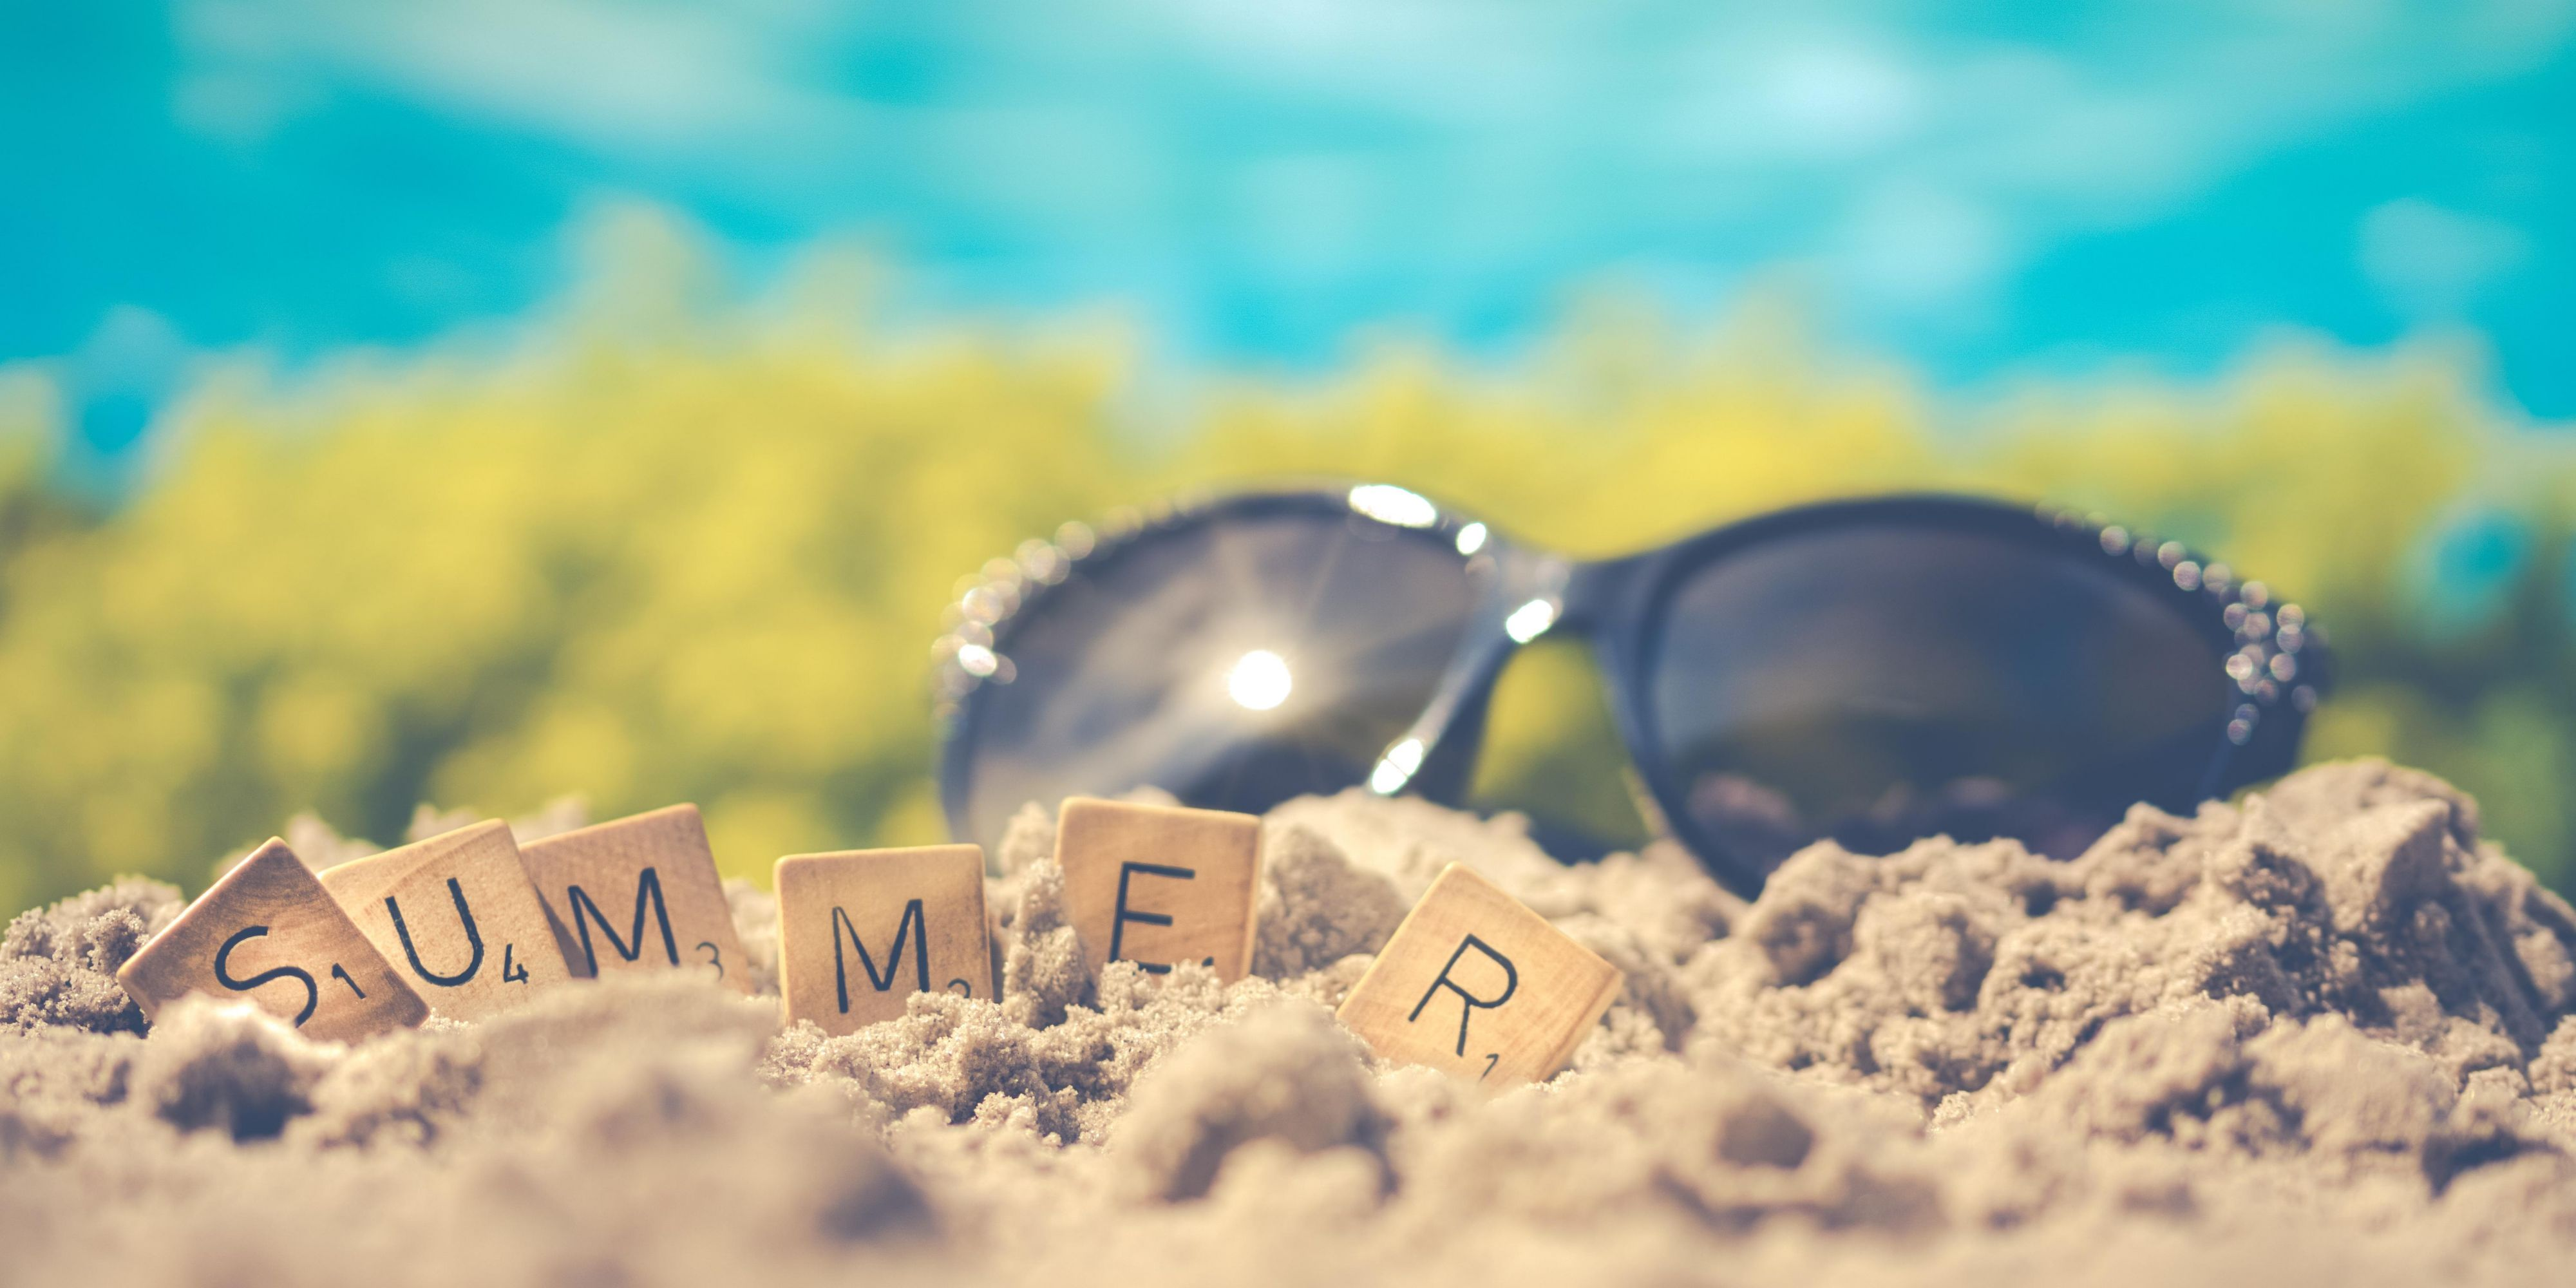


Of course you'll have noticed this model does not take into account the flight tickets price nor the distance/time travel among the optimum destinations but it only worries about providing the most convinient combination of packages for making you save money. In short, this model should be taken as a first aproach that can be improved.

The datset used in this project was provided by Anna Nicanorova and you can find it at: https://github.com/AnnaNican/optimizers/blob/master/clymb_adventures.csv

### That's it, enjoy your vacations!